![image](arms_races.png)

![rivals](rivals.png)

In [1]:
from gb_mod import EconMod

%matplotlib inline
import matplotlib.pyplot as plt

import random
import numpy as np

import pandas as pd

## Minimal Guns-Butter Tradeoff

In [61]:
height = 14
width = 14
density = 1
domestic_min = 0.04 # Min of gdp to extract for governance
domestic_max = 0.32 # Max of gdp to extract for governance
expenditures = 0.6 # Vary for final analysis -- percent of extracted rents that must go to public programs
num_adversaries = 2 # Vary for final analysis -- top n neighbors power-wise to consider for balancing
random.seed(12345)

In [63]:
#model = EconMod(height, width, density, 
#                domestic_min, domestic_max, 
#                num_adversaries, pareto_scale)
#model = EconMod(height, width, density, 
#                domestic_min, domestic_max, 
#                num_adversaries)
model = EconMod(height, width, density, 
                domestic_min, domestic_max, 
                num_adversaries, expenditures)



#model = EconMod(height, width, density, domestic, expend, num_adversaries, pareto_scale)

## Starting Conditions

### Economy

In [64]:
agent_econ = [a.econ for a in model.schedule.agents]

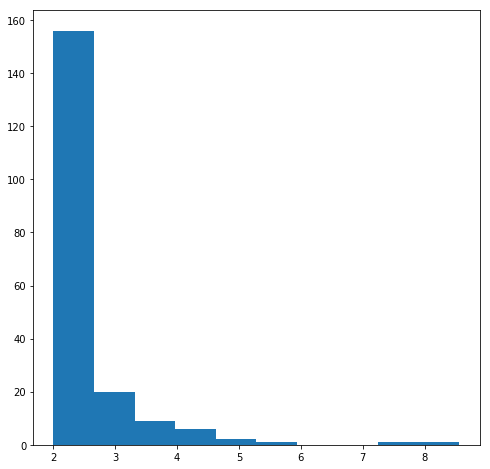

In [65]:
plt.figure(figsize = (8, 8))
plt.hist(agent_econ)
# plt.savefig('start_hist.png', bbox_inches='tight') ## Save image
plt.show() ## Don't show array output

### Arms

In [66]:
agent_arms = [a.arms for a in model.schedule.agents]

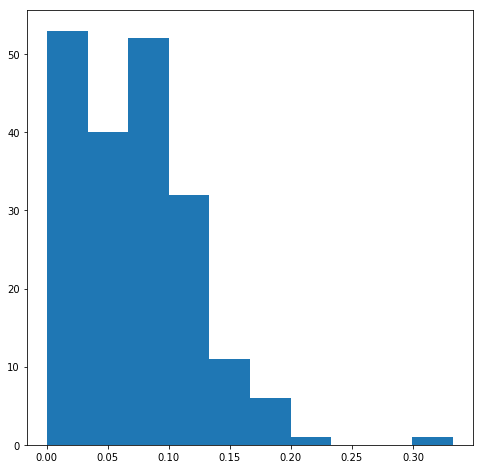

In [67]:
plt.figure(figsize = (8, 8))
plt.hist(agent_arms)
# plt.savefig('start_hist.png', bbox_inches='tight') ## Save image
plt.show() ## Don't show array output

In [68]:
agent_arms = np.zeros((model.grid.width, model.grid.height))
for a in model.schedule.agents:
    X = a.pos[0]
    Y = a.pos[1]
    arms = a.arms
    agent_arms[X][Y] = arms

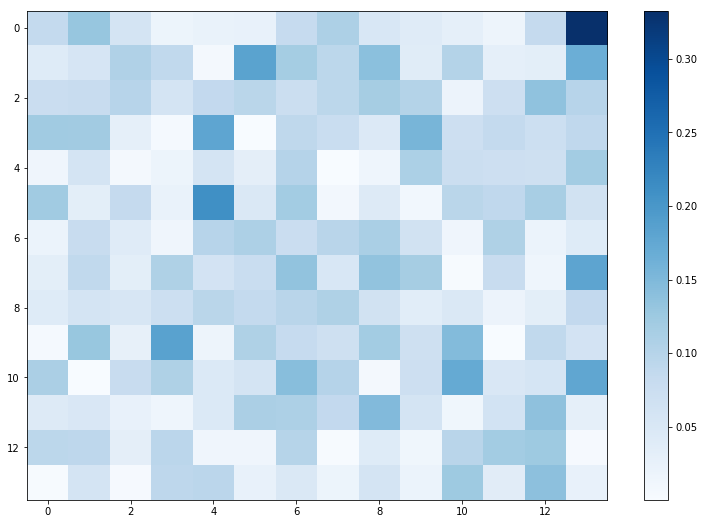

In [69]:
plt.figure(figsize = (13, 9))
plt.imshow(agent_arms, interpolation='nearest', aspect = 'auto', cmap="Blues")
plt.colorbar()
#plt.savefig('arms_start.pdf', bbox_inches='tight') ## Save image
plt.show()

In [70]:
agent_burden = np.zeros((model.grid.width, model.grid.height))
for a in model.schedule.agents:
    X = a.pos[0]
    Y = a.pos[1]
    burden = a.mil_burden
    agent_burden[X][Y] = burden

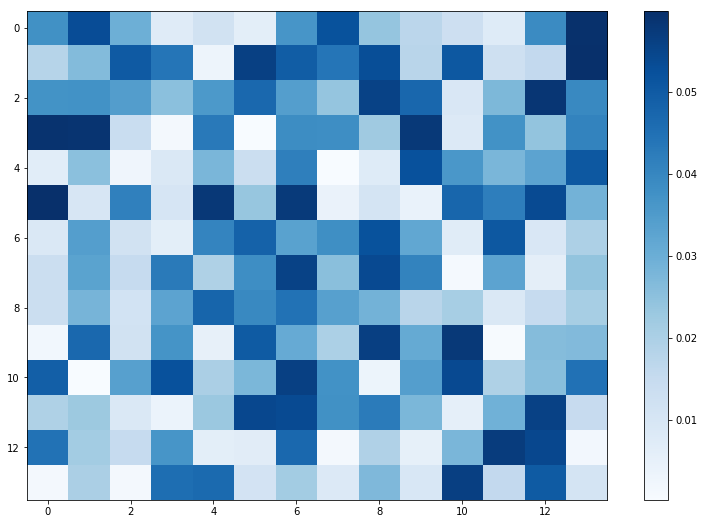

In [71]:
plt.figure(figsize = (13, 9))
plt.imshow(agent_burden, interpolation='nearest', aspect = 'auto', cmap="Blues")
plt.colorbar()
## plt.savefig('burden_start.pdf', bbox_inches='tight') ## Save image
plt.show()

### 10 Steps

In [72]:
for i in range(10):
    model.step()

In [73]:
agent_arms = np.zeros((model.grid.width, model.grid.height))
for a in model.schedule.agents:
    X = a.pos[0]
    Y = a.pos[1]
    arms = a.arms
    agent_arms[X][Y] = arms

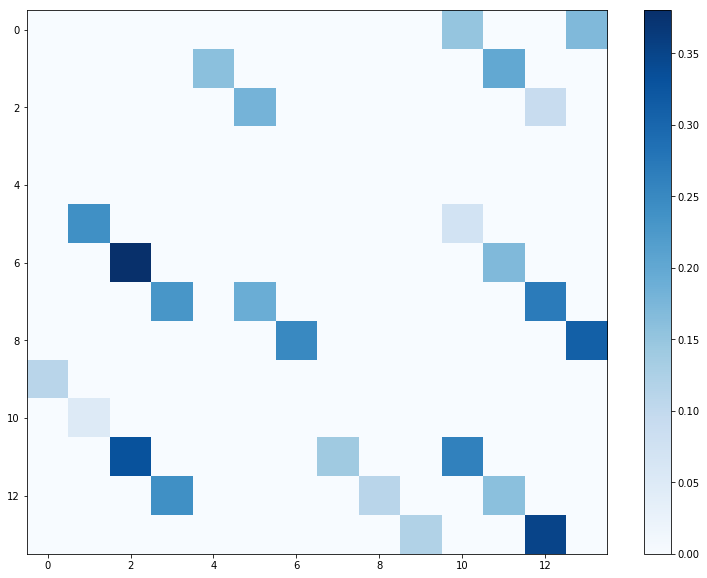

In [74]:
plt.figure(figsize = (13, 10))
plt.imshow(agent_arms, interpolation='nearest', aspect = 'auto', cmap="Blues")
plt.colorbar()
# plt.savefig('grid2.png', bbox_inches='tight') ## Save image
plt.show()

### Military Burden - arms/gdp

In [75]:
agent_burden = np.zeros((model.grid.width, model.grid.height))
for a in model.schedule.agents:
    X = a.pos[0]
    Y = a.pos[1]
    burden = a.mil_burden
    agent_burden[X][Y] = burden

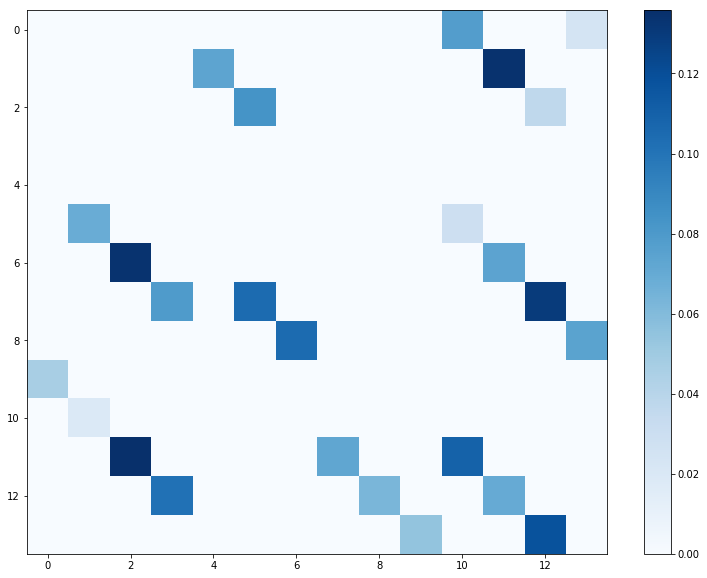

In [76]:
plt.figure(figsize = (13, 10))
plt.imshow(agent_burden, interpolation='nearest', aspect = 'auto', cmap="Blues")
plt.colorbar()
# plt.savefig('grid1.png', bbox_inches='tight') ## Save image
plt.show()

## Military Spending/Total Available 

In [77]:
agent_competition = np.zeros((model.grid.width, model.grid.height))
for a in model.schedule.agents:
    X = a.pos[0]
    Y = a.pos[1]
    arms = a.arms
    domestic = a.domestic * a.econ
    agent_competition[X][Y] = arms/domestic

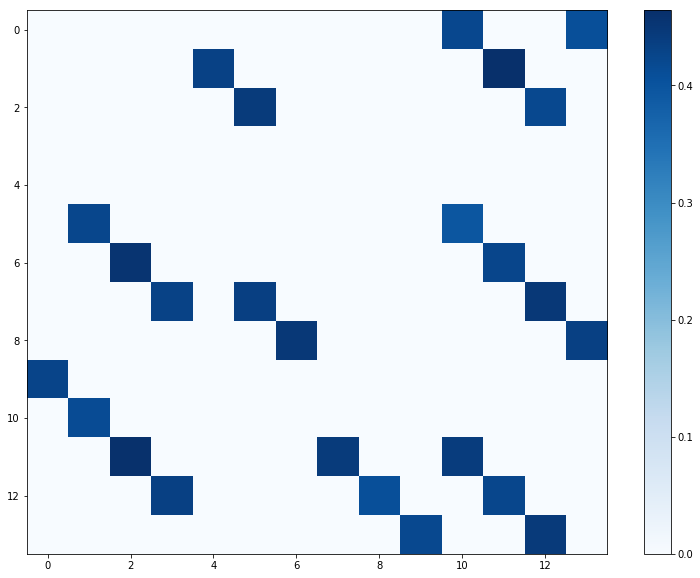

In [78]:
plt.figure(figsize = (13, 10))
plt.imshow(agent_competition, interpolation='nearest', aspect = 'auto', cmap="Blues")
plt.colorbar()
# plt.savefig('grid1.png', bbox_inches='tight') ## Save image
plt.show()

### 100 Rounds

In [79]:
for i in range(100):
    model.step()

In [80]:
agent_arms = np.zeros((model.grid.width, model.grid.height))
for a in model.schedule.agents:
    X = a.pos[0]
    Y = a.pos[1]
    arms = a.arms
    agent_arms[X][Y] = arms

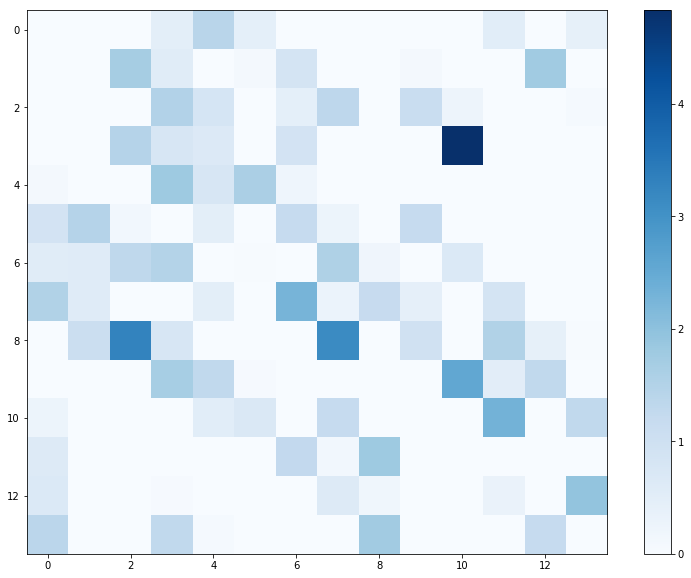

In [81]:
plt.figure(figsize = (13, 10))
plt.imshow(agent_arms, interpolation='nearest', aspect = 'auto', cmap = 'Blues')
plt.colorbar()
# plt.savefig('grid4.png', bbox_inches='tight') ## save image
plt.show()

### Military Burden

In [82]:
agent_burden = np.zeros((model.grid.width, model.grid.height))
for a in model.schedule.agents:
    X = a.pos[0]
    Y = a.pos[1]
    burden = a.mil_burden
    agent_burden[X][Y] = burden

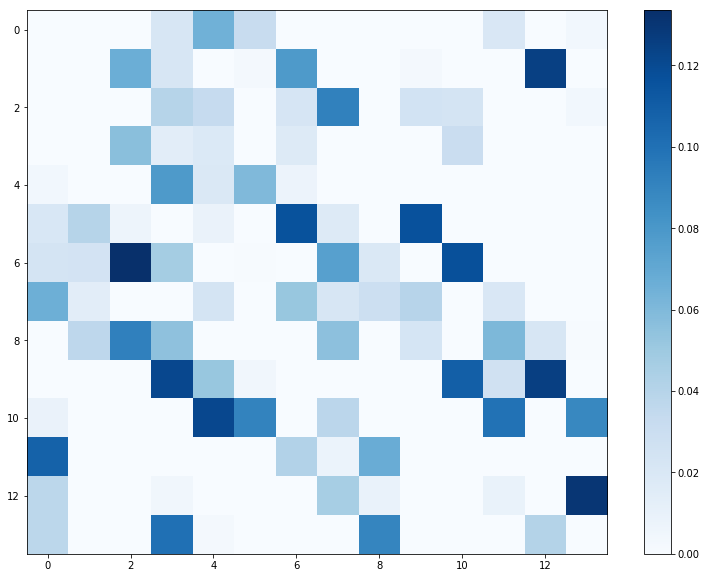

In [83]:
plt.figure(figsize = (13, 10))
plt.imshow(agent_burden, interpolation='nearest', aspect = 'auto', cmap="Blues")
plt.colorbar()
# plt.savefig('grid1.png', bbox_inches='tight') ## Save image
plt.show()

## Military Burden/Domestic Available

In [84]:
agent_competition = np.zeros((model.grid.width, model.grid.height))
for a in model.schedule.agents:
    X = a.pos[0]
    Y = a.pos[1]
    arms = a.arms
    domestic = a.domestic * a.econ
    agent_competition[X][Y] = arms/domestic

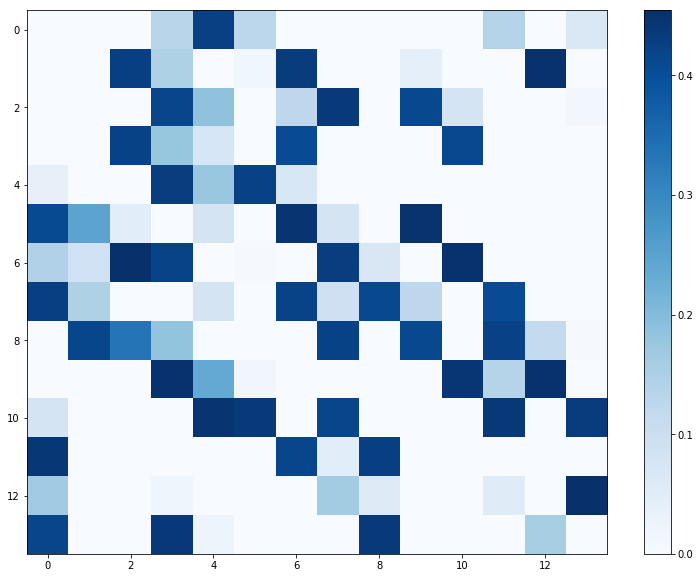

In [85]:
plt.figure(figsize = (13, 10))
plt.imshow(agent_competition, interpolation='nearest', aspect = 'auto', cmap="Blues")
plt.colorbar()
# plt.savefig('grid1.png', bbox_inches='tight') ## Save image
plt.show()

### Economy

In [86]:
agent_econ = [a.econ for a in model.schedule.agents]

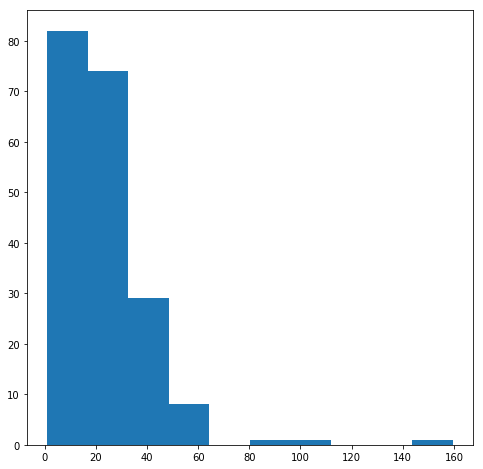

In [87]:
plt.figure(figsize = (8, 8))
plt.hist(agent_econ)
# plt.savefig('start_hist.png', bbox_inches='tight') ## Save image
plt.show() ## Don't show array output

### 1000 Rounds

In [ ]:
for i in range(1000):
    model.step()

In [ ]:
agent_arms = np.zeros((model.grid.width, model.grid.height))
for a in model.schedule.agents:
    X = a.pos[0]
    Y = a.pos[1]
    arms = a.arms
    agent_arms[X][Y] = arms

In [ ]:
plt.figure(figsize = (13, 10))
plt.imshow(agent_arms, interpolation='nearest', aspect = 'auto', cmap = 'Blues')
plt.colorbar()
# plt.savefig('grid4.png', bbox_inches='tight') ## save image
plt.show()

### Military Burden

In [57]:
agent_burden = np.zeros((model.grid.width, model.grid.height))
for a in model.schedule.agents:
    X = a.pos[0]
    Y = a.pos[1]
    burden = a.mil_burden
    agent_burden[X][Y] = burden

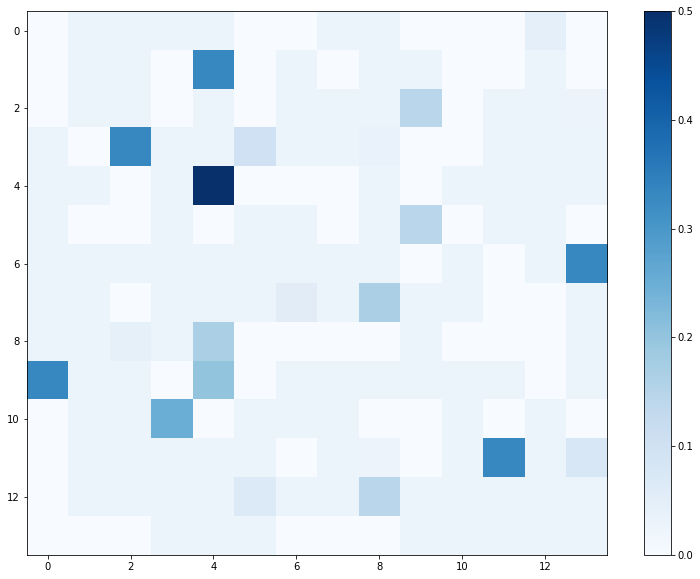

In [58]:
plt.figure(figsize = (13, 10))
plt.imshow(agent_burden, interpolation='nearest', aspect = 'auto', cmap="Blues")
plt.colorbar()
# plt.savefig('grid1.png', bbox_inches='tight') ## Save image
plt.show()

## Military Burden/Domestic Available

In [59]:
agent_competition = np.zeros((model.grid.width, model.grid.height))
for a in model.schedule.agents:
    X = a.pos[0]
    Y = a.pos[1]
    arms = a.arms
    domestic = a.domestic * a.econ
    agent_competition[X][Y] = arms/domestic

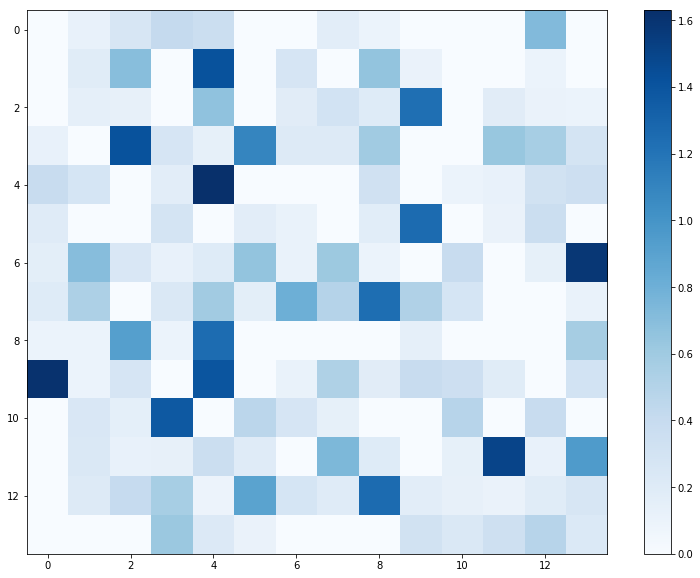

In [60]:
plt.figure(figsize = (13, 10))
plt.imshow(agent_competition, interpolation='nearest', aspect = 'auto', cmap="Blues")
plt.colorbar()
# plt.savefig('grid1.png', bbox_inches='tight') ## Save image
plt.show()

### 10000 Rounds

In [ ]:
for i in range(10000):
    model.step()

In [ ]:
agent_arms = np.zeros((model.grid.width, model.grid.height))
for a in model.schedule.agents:
    X = a.pos[0]
    Y = a.pos[1]
    arms = a.arms
    agent_arms[X][Y] = arms

In [ ]:
plt.figure(figsize = (13, 10))
plt.imshow(agent_arms, interpolation='nearest', aspect = 'auto', cmap = 'Blues')
plt.colorbar()
# plt.savefig('grid4.png', bbox_inches='tight') ## save image
plt.show()

### Military Burden

In [ ]:
agent_burden = np.zeros((model.grid.width, model.grid.height))
for a in model.schedule.agents:
    X = a.pos[0]
    Y = a.pos[1]
    burden = a.mil_burden
    agent_burden[X][Y] = burden

In [ ]:
plt.figure(figsize = (13, 10))
plt.imshow(agent_burden, interpolation='nearest', aspect = 'auto', cmap="Blues")
plt.colorbar()
# plt.savefig('grid1.png', bbox_inches='tight') ## Save image
plt.show()

## Military Burden/Domestic Available

In [ ]:
agent_competition = np.zeros((model.grid.width, model.grid.height))
for a in model.schedule.agents:
    X = a.pos[0]
    Y = a.pos[1]
    arms = a.arms
    domestic = a.domestic * a.econ
    agent_competition[X][Y] = arms/domestic

In [ ]:
plt.figure(figsize = (13, 10))
plt.imshow(agent_competition, interpolation='nearest', aspect = 'auto', cmap="Blues")
plt.colorbar()
# plt.savefig('grid1.png', bbox_inches='tight') ## Save image
plt.show()